<a href="https://colab.research.google.com/github/faiyazansari566/Projects-practice/blob/main/CustomerChurnAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
df.shape

(7043, 21)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [62]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [63]:
##checking null values

In [64]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
                   ..
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Length: 21, dtype: int64

In [65]:
##no null values

In [66]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())
  print('\n')

customerID
4418-LZMSV    1
7442-YGZFK    1
3635-QQRQD    1
8231-BSWXX    1
7814-LEEVE    1
             ..
8587-XYZSF    1
2039-JONDJ    1
4957-TREIR    1
5628-RKIFK    1
1589-AGTLK    1
Name: customerID, Length: 7043, dtype: int64


gender
Male      3555
Female    3488
Name: gender, dtype: int64


SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


Partner
No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity
No              

In [67]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [68]:
##the data is imbalanced

In [69]:
print('% of Yes ',df['Churn'].value_counts()[0] / df.shape[0])
print('% of No ',df['Churn'].value_counts()[1] / df.shape[0])

% of Yes  0.7346301292063041
% of No  0.2653698707936959


In [70]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [71]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [72]:
x2 , y2 = ros.fit_resample(x,y)
x2 = pd.DataFrame(x2,columns=df.columns[0:-1])
y2 = pd.DataFrame(y2,columns=['Churn'])

In [73]:
df2 = pd.concat((x2,y2),axis=1)

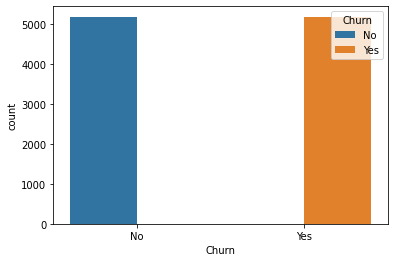

In [74]:
sns.countplot(df2['Churn'],hue=df2['Churn'])

In [75]:
df2.shape

(10348, 21)

In [76]:
## now the data is balanced

In [77]:
pd.set_option("display.max_rows",20)

In [78]:
## total charges are empty at some cells...changing it to NaN

In [79]:
df2['TotalCharges']= pd.to_numeric(df2['TotalCharges'], errors='coerce') #errors='coerce'. This will convert the blank spaces to NaN
df2['TotalCharges'].isnull().sum()

11

In [80]:
df2['TotalCharges'] = df2['TotalCharges'].fillna(df2['TotalCharges'].mean())

In [81]:
df2['TotalCharges'].isnull().sum()

0

In [82]:
for i in df2.columns:
  print(i,'-->' ,df2[i].nunique())
  print('\n')

customerID --> 7043


gender --> 2


SeniorCitizen --> 2


Partner --> 2


Dependents --> 2


tenure --> 73


PhoneService --> 2


MultipleLines --> 3


InternetService --> 3


OnlineSecurity --> 3


OnlineBackup --> 3


DeviceProtection --> 3


TechSupport --> 3


StreamingTV --> 3


StreamingMovies --> 3


Contract --> 3


PaperlessBilling --> 2


PaymentMethod --> 4


MonthlyCharges --> 1585


TotalCharges --> 6531


Churn --> 2




In [83]:
for i in df2.columns:
  print(i)
  print(df2[i].value_counts())
  print('\n')

customerID
3571-RFHAR    9
2660-EMUBI    8
7409-KIUTL    8
6618-RYATB    7
1029-QFBEN    7
             ..
0582-AVCLN    1
5012-YSPJJ    1
9308-ANMVE    1
1730-ZMAME    1
4412-YLTKF    1
Name: customerID, Length: 7043, dtype: int64


gender
Male      5184
Female    5164
Name: gender, dtype: int64


SeniorCitizen
0    8325
1    2023
Name: SeniorCitizen, dtype: int64


Partner
No     5773
Yes    4575
Name: Partner, dtype: int64


Dependents
No     7639
Yes    2709
Name: Dependents, dtype: int64


tenure
1     1283
2      424
3      391
72     375
4      318
      ... 
36      74
59      70
45      64
44      61
0       11
Name: tenure, Length: 73, dtype: int64


PhoneService
Yes    9371
No      977
Name: PhoneService, dtype: int64


MultipleLines
No                  4894
Yes                 4477
No phone service     977
Name: MultipleLines, dtype: int64


InternetService
Fiber optic    5420
DSL            3193
No             1735
Name: InternetService, dtype: int64


OnlineSecurity
No   

In [84]:
df2.drop('customerID',axis=1,inplace=True)

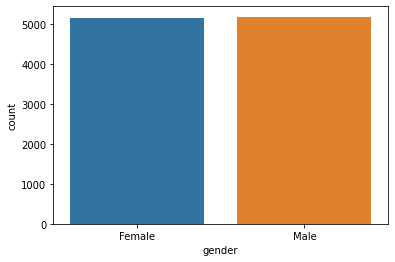

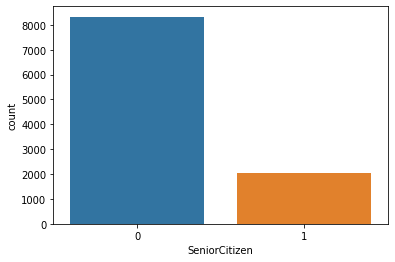

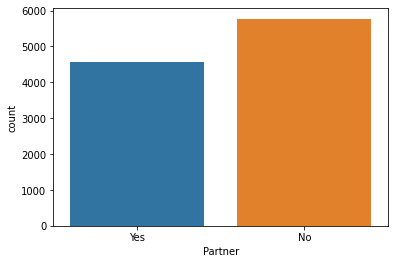

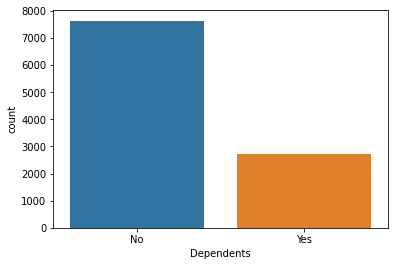

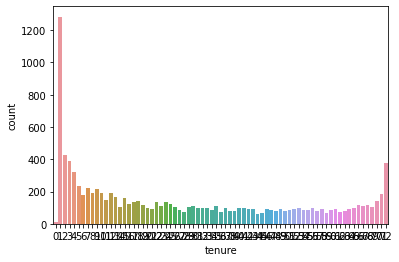

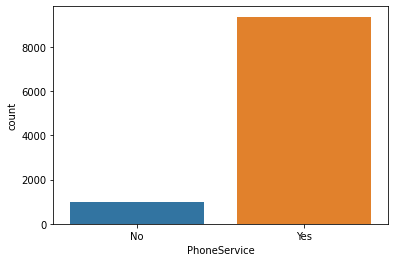

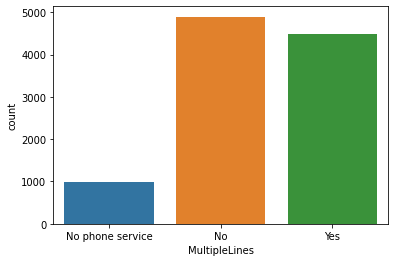

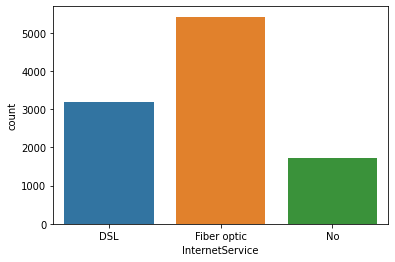

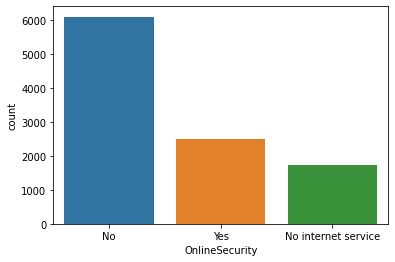

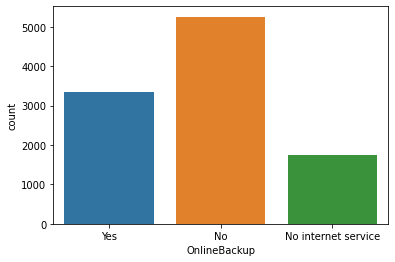

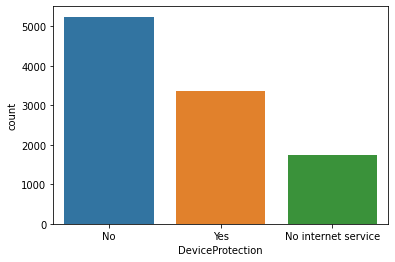

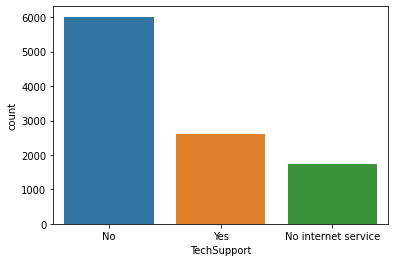

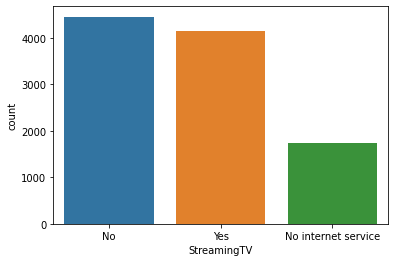

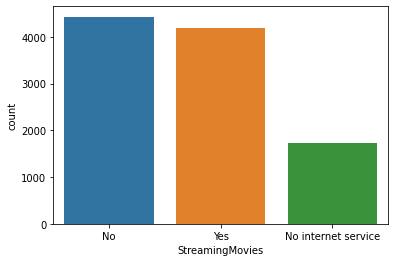

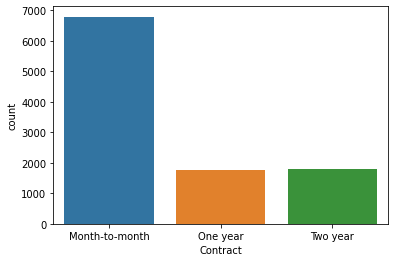

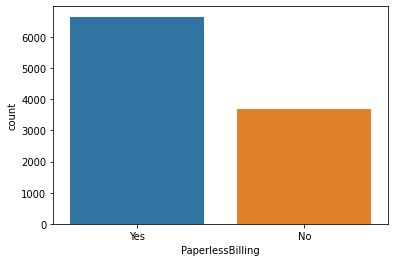

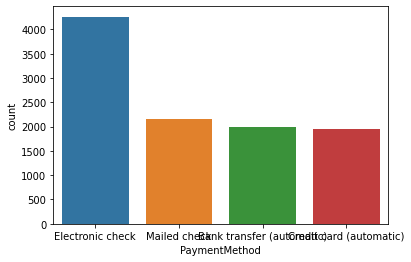

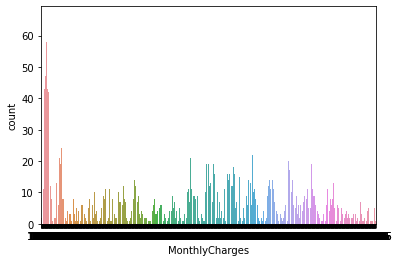

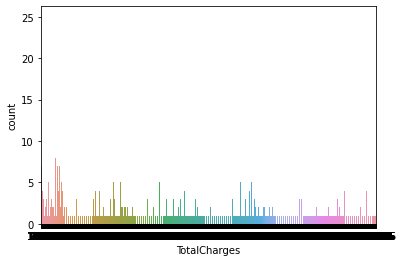

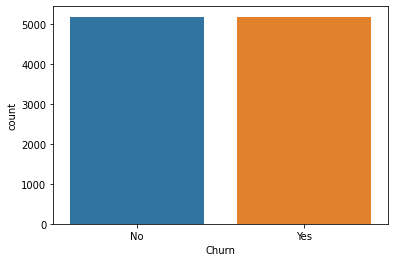

In [85]:
for i in df2.columns:
  plt.figure()
  sns.countplot(df2[i])
  plt.show()

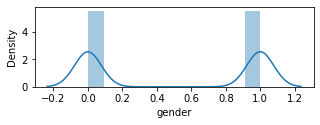

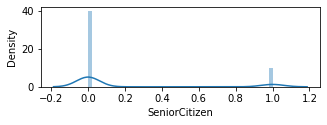

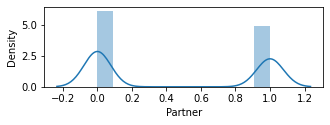

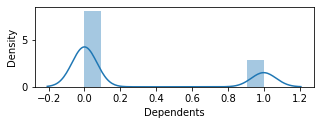

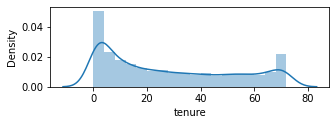

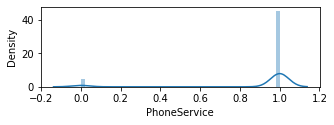

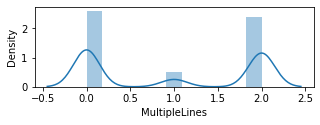

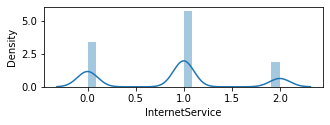

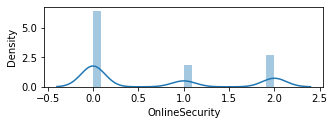

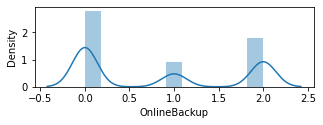

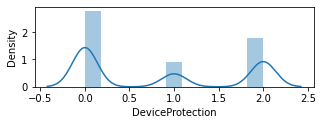

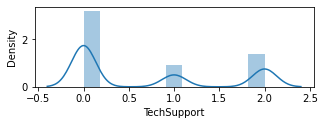

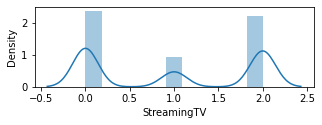

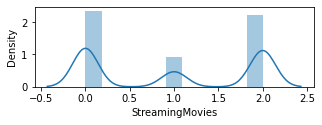

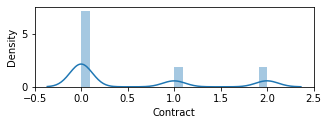

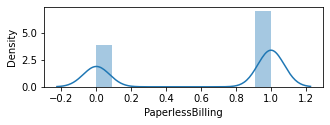

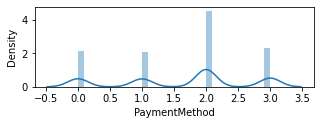

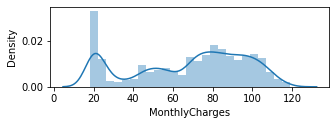

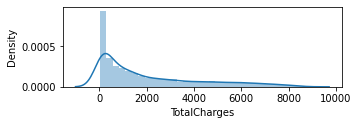

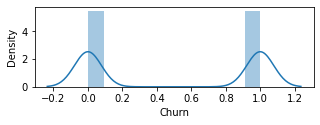

In [104]:
for i in df2.columns:
        plt.figure(figsize=(5,5))
        plt.subplot(3,1,3)
        sns.distplot(df2[i])

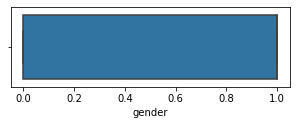

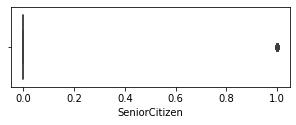

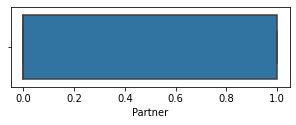

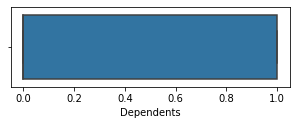

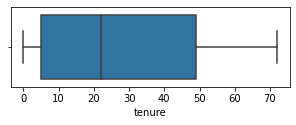

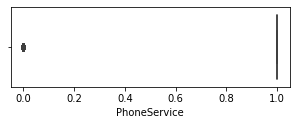

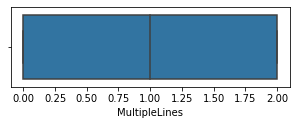

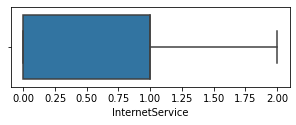

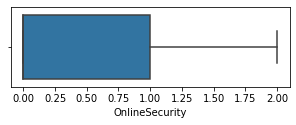

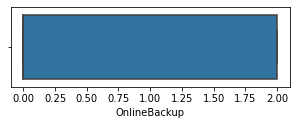

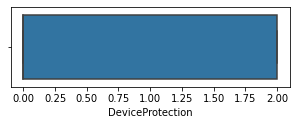

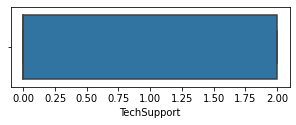

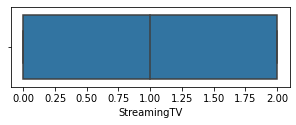

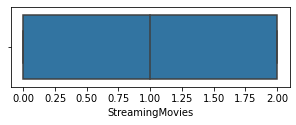

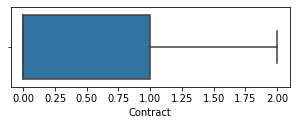

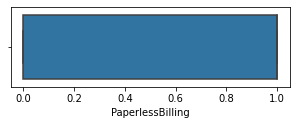

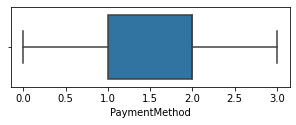

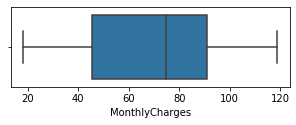

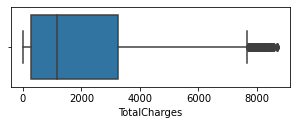

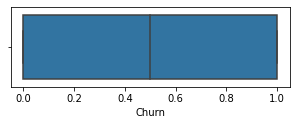

In [105]:
for i in df2.columns:
        plt.figure(figsize=(5,5))
        plt.subplot(3,1,3)
        sns.boxplot(df2[i])

In [106]:
## outliers present only in totalcharges

In [89]:
df2.groupby('Churn').mean()

,TotalCharges
Churn,
No,2554.272629
Yes,1548.415124


In [92]:
df2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [93]:
df2.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure               object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges       object
TotalCharges        float64
Churn                object
dtype: object

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [95]:
def encode(df,col):
  df[col] = le.fit_transform(df[col])

In [96]:
encode(df2,'gender')
encode(df2,'Partner')
encode(df2,'Dependents')
encode(df2,'PhoneService')
encode(df2,'MultipleLines')
encode(df2,'InternetService')
encode(df2,'OnlineSecurity')
encode(df2,'OnlineBackup')
encode(df2,'DeviceProtection')
encode(df2,'TechSupport')
encode(df2,'StreamingTV')
encode(df2,'StreamingMovies')
encode(df2,'Contract')
encode(df2,'PaperlessBilling')
encode(df2,'PaymentMethod')
encode(df2,'Churn')

In [97]:
df2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [98]:
df2.dtypes

gender                int64
SeniorCitizen        object
Partner               int64
Dependents            int64
tenure               object
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges       object
TotalCharges        float64
Churn                 int64
dtype: object

In [99]:
df2['TotalCharges'] = df2['TotalCharges'].astype(float)
df2['SeniorCitizen'] = df2['SeniorCitizen'].astype(float)

In [100]:
df2['TotalCharges'].value_counts()

20.20      25
19.45      18
69.60      15
69.95      15
74.70      15
           ..
1769.60     1
7576.70     1
4487.30     1
116.60      1
1024.00     1
Name: TotalCharges, Length: 6531, dtype: int64

In [101]:
# removing outliers

In [102]:
df2.dtypes

gender                int64
SeniorCitizen       float64
Partner               int64
Dependents            int64
tenure               object
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges       object
TotalCharges        float64
Churn                 int64
dtype: object

In [110]:
df3 = df2[df2['TotalCharges']<8000] ## outliers are present only in totalcharges

In [111]:
df3.shape, df2.shape

((10262, 20), (10348, 20))

In [112]:
df3.skew()

gender             -0.004678
SeniorCitizen       1.533665
Partner             0.247076
Dependents          1.088196
tenure              0.510243
PhoneService       -2.758810
MultipleLines       0.097378
InternetService     0.182294
OnlineSecurity      0.748970
OnlineBackup        0.386462
DeviceProtection    0.383629
TechSupport         0.710435
StreamingTV         0.074384
StreamingMovies     0.064764
Contract            1.105042
PaperlessBilling   -0.590178
PaymentMethod      -0.334628
MonthlyCharges     -0.407699
TotalCharges        1.096137
Churn              -0.012475
dtype: float64

In [113]:
df4 = df3.copy()

In [119]:
#for i in df4.columns:
  #if (df4[i].skew() > 0.5):
    #df4[i] = np.sqrt(df4[i])

In [122]:
x=df4.iloc[:,0:-1]
y=pd.DataFrame(df4.iloc[:,-1])
x.shape , y.shape

((10262, 19), (10262, 1))

In [124]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.002341,-0.493383,1.13112,-0.594382,-1.115346,-3.082788,0.051393,-1.264893,-0.766670,1.338611,-0.907384,-0.779884,-1.056562,-1.061692,-0.661265,0.747572,0.352267,-1.313795,-0.931300
1,0.997664,-0.493383,-0.88408,-0.594382,0.271775,0.324382,-1.001291,-1.264893,1.617803,-0.906152,1.336639,-0.779884,-1.056562,-1.061692,0.647491,-1.337664,1.338613,-0.368647,-0.051849
2,0.997664,-0.493383,-0.88408,-0.594382,-1.073312,0.324382,-1.001291,-1.264893,1.617803,1.338611,-0.907384,-0.779884,-1.056562,-1.061692,-0.661265,0.747572,1.338613,-0.476764,-0.894271
3,0.997664,-0.493383,-0.88408,-0.594382,0.734149,-3.082788,0.051393,-1.264893,1.617803,-0.906152,1.336639,1.585469,-1.056562,-1.061692,0.647491,-1.337664,-1.620426,-0.879585,-0.074904
4,-1.002341,-0.493383,-0.88408,-0.594382,-1.073312,0.324382,-1.001291,0.209475,-0.766670,-0.906152,-0.907384,-0.779884,-1.056562,-1.061692,-0.661265,0.747572,0.352267,0.110901,-0.873700


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def max_acc_score(reg,x1,y1):
    max_acc_score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print("The max accuracy score ", max_acc_score, "is achieved at", final_r_state)
    return final_r_state

In [126]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

max_acc_score(lg,x,y)

The max accuracy score  0.7920116902094496 is achieved at 68


68

In [127]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=68,test_size=0.20)

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'brute', 'n_neighbors': 10, 'weights': 'distance'}

In [129]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [130]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 10, 'kernel': 'rbf'}

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy score is  0.7920116902094496

The cross val score is 0.7634962480618389

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1030
           1       0.77      0.83      0.80      1023

    accuracy                           0.79      2053
   macro avg       0.79      0.79      0.79      2053
weighted avg       0.79      0.79      0.79      2053


[[775 255]
 [172 851]]

roc_auc_score 0.7921471210697645


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
    

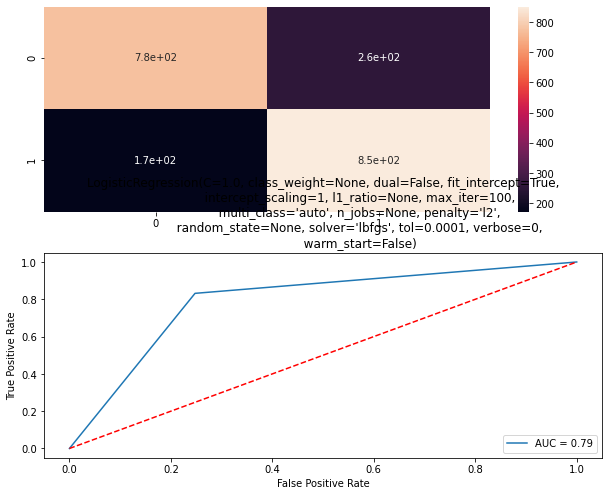

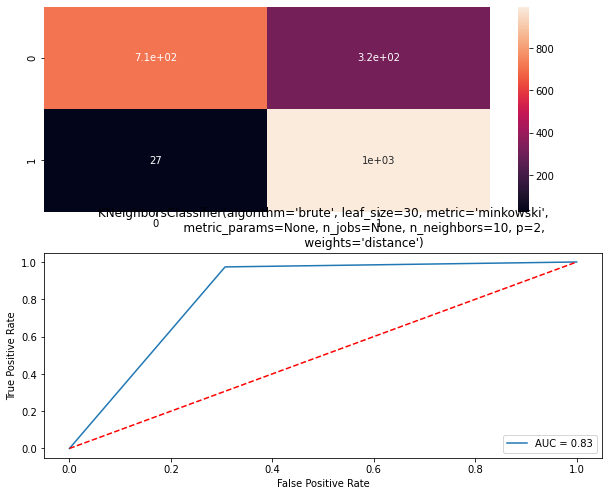

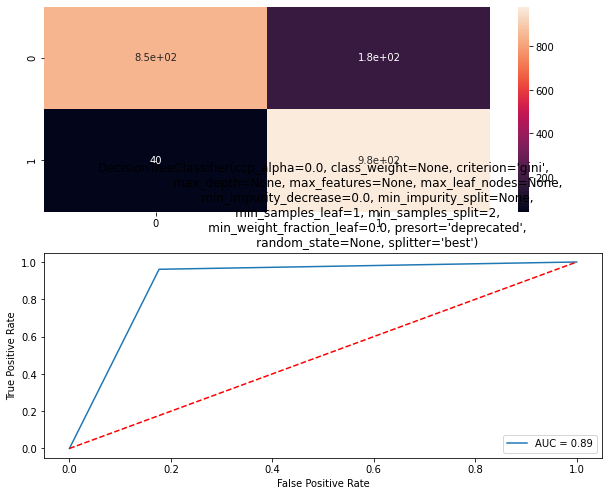

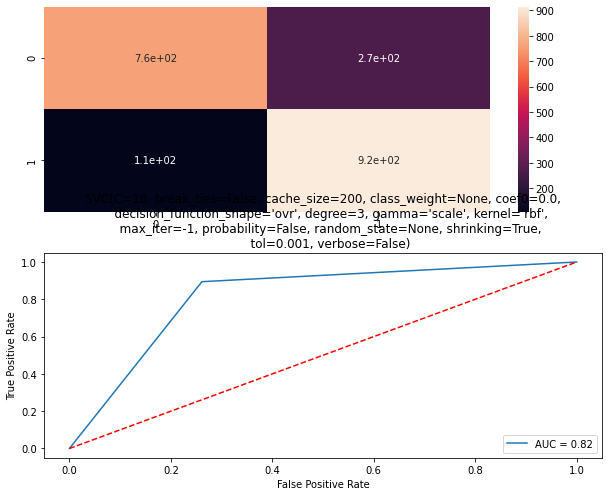

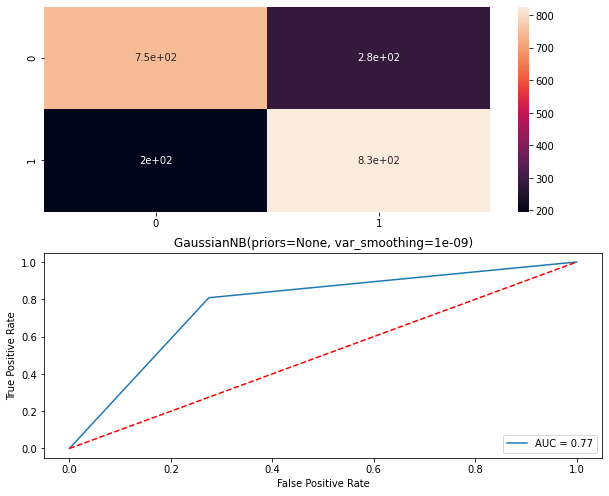

In [131]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

score=[]
cv=[]
rocscore=[]


algorithms=[lg,KNeighborsClassifier(algorithm='brute', n_neighbors= 10, weights='distance'), DecisionTreeClassifier(criterion= 'gini', splitter= 'best'), SVC(C=10, kernel='rbf'), GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [132]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,0.792012,0.763496,0.792147
1,<class 'sklearn.neighbors._classification.KNei...,0.832927,0.828593,0.833405
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.891866,0.881704,0.892100
3,<class 'sklearn.svm._classes.SVC'>,0.816366,0.814170,0.816632
4,<class 'sklearn.naive_bayes.GaussianNB'>,0.766683,0.747417,0.766825


In [133]:
## decision tree is working best

In [139]:
#trying with algorithms

SyntaxError: ignored

In [135]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators':(10,50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 100}

In [142]:
rf=RandomForestClassifier(n_estimators=100)
max_acc_score(rf,x,y)

The max accuracy score  0.9074525085241111 is achieved at 83


83

In [143]:
cs=cross_val_score(rf,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of Random forest classifier is", cs)

The cross val score of Random forest classifier is 0.9041149784131814


In [138]:
from sklearn.ensemble import GradientBoostingClassifier
gc=GradientBoostingClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500)}
gd=GridSearchCV(gc,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'learning_rate': 1, 'n_estimators': 500}

In [141]:
gcd=GradientBoostingClassifier(learning_rate=1, n_estimators= 500)
max_acc_score(gcd,x,y)

The max accuracy score  0.8869946419873356 is achieved at 77


77

In [145]:
cs=cross_val_score(gcd,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of GradientBoosting classifier is", cs)

The cross val score of GradientBoosting classifier is 0.8776115208191502


In [146]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500)}
gd=GridSearchCV(ad,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [147]:
ada=AdaBoostClassifier(learning_rate= 1, n_estimators= 200)
max_acc_score(ada,x,y)

The max accuracy score  0.7968826108134437 is achieved at 46


46

In [148]:
cs=cross_val_score(ada,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of AdaBoost classifier is", cs)

The cross val score of AdaBoost classifier is 0.7729495845475028


In [150]:
results_booster=pd.DataFrame({'Boosters':['RandomForestClassifier','GradientBoostClassifier','AdaBoostRegressor'],'Accuracy Score':[0.9,0.88,0.79],'Cross_val_score':[0.9,0.87,0.77]})
results_booster

,Boosters,Accuracy Score,Cross_val_score
0,RandomForestClassifier,0.90,0.90
1,GradientBoostClassifier,0.88,0.87
2,AdaBoostRegressor,0.79,0.77


In [151]:
## random forest is performing best 

In [152]:
## saving the model

In [153]:
import joblib
joblib.dump(rf,'CustomerChurn.pkl')

['CustomerChurn.pkl']